<a href="https://colab.research.google.com/github/rajdeepbanerjee-git/JNCLectures_Intro_to_ML/blob/main/Week8/Week8_classification_metrics_2025.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [26]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (confusion_matrix, accuracy_score, precision_score, recall_score,
                             f1_score, roc_curve, roc_auc_score, precision_recall_curve)
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

import warnings
warnings.filterwarnings("ignore")  # Suppress all warnings

In [6]:
# Load the Titanic dataset from seaborn
df = sns.load_dataset('titanic')
print(df.info())
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB
None


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [7]:
# Preprocessing: drop rows with missing values and encode categorical variables
df = df.dropna(subset=['age', 'fare', 'embarked', 'sex', 'survived'])
df['sex'] = LabelEncoder().fit_transform(df['sex'])
df['embarked'] = LabelEncoder().fit_transform(df['embarked'])


In [8]:
# Select features and target variable
features = ['pclass', 'age', 'fare', 'sex', 'embarked']
X = df[features]
y = df['survived']

In [9]:
# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [10]:
# Train logistic regression
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)
y_prob = model.predict_proba(X_test)[:, 1]
y_pred = (y_prob >= 0.5).astype(int)

In [20]:
# Compute confusion matrix and metrics

def all_metrics(y_test, y_pred):

  cm = confusion_matrix(y_test, y_pred)
  acc = accuracy_score(y_test, y_pred)
  prec = precision_score(y_test, y_pred)
  rec = recall_score(y_test, y_pred)
  f1 = f1_score(y_test, y_pred)

  print("Confusion Matrix:\n", cm)
  print("Accuracy:", acc)
  print("Precision:", prec)
  print("Recall (Sensitivity):", rec)
  print("F1 Score:", f1)

all_metrics(y_test, y_pred)

Confusion Matrix:
 [[108  14]
 [ 33  59]]
Accuracy: 0.780373831775701
Precision: 0.8082191780821918
Recall (Sensitivity): 0.6413043478260869
F1 Score: 0.7151515151515152


In [13]:
# Compute F-beta scores
def f_beta(precision, recall, beta):
    return (1 + beta**2) * (precision * recall) / ((beta**2 * precision) + recall)

f2 = f_beta(prec, rec, beta=2)
print("F2 Score:", f2)

F2 Score: 0.6689342403628117


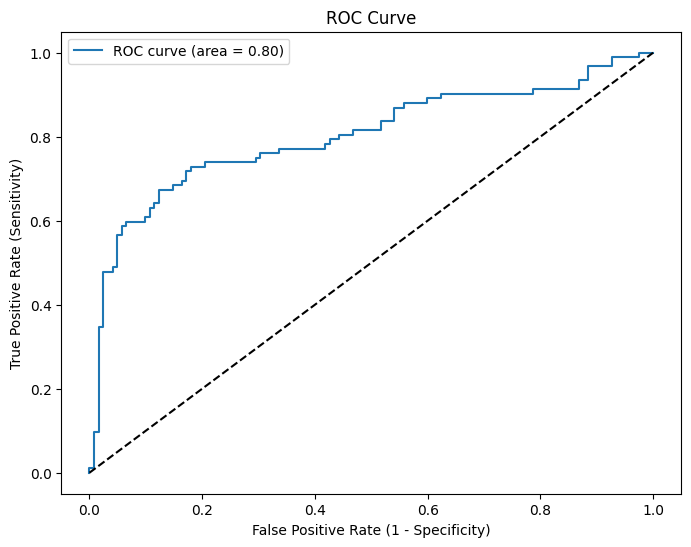

In [14]:
# ROC Curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
auc = roc_auc_score(y_test, y_prob)
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, label=f'ROC curve (area = {auc:.2f})')
plt.plot([0,1], [0,1], 'k--')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.title('ROC Curve')
plt.legend()
plt.show()

In [15]:
# Sensitivity vs. Specificity Curve and Optimal Threshold (Youden's Index)
specificity = 1 - fpr
youden_index = tpr + specificity - 1
optimal_idx = np.argmax(youden_index)
optimal_threshold = thresholds[optimal_idx]
print("Optimal Threshold based on Youden's Index:", optimal_threshold)

Optimal Threshold based on Youden's Index: 0.4903731768149499


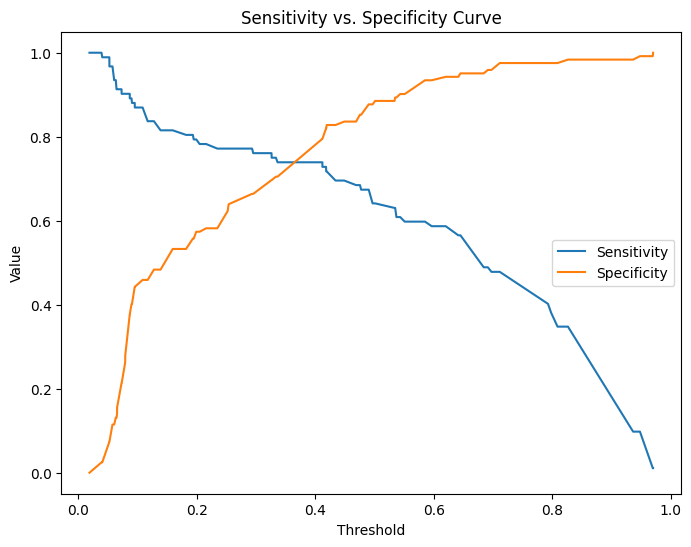

In [16]:
plt.figure(figsize=(8,6))
plt.plot(thresholds, tpr, label='Sensitivity')
plt.plot(thresholds, specificity, label='Specificity')
plt.xlabel('Threshold')
plt.ylabel('Value')
plt.title('Sensitivity vs. Specificity Curve')
plt.legend()
plt.show()

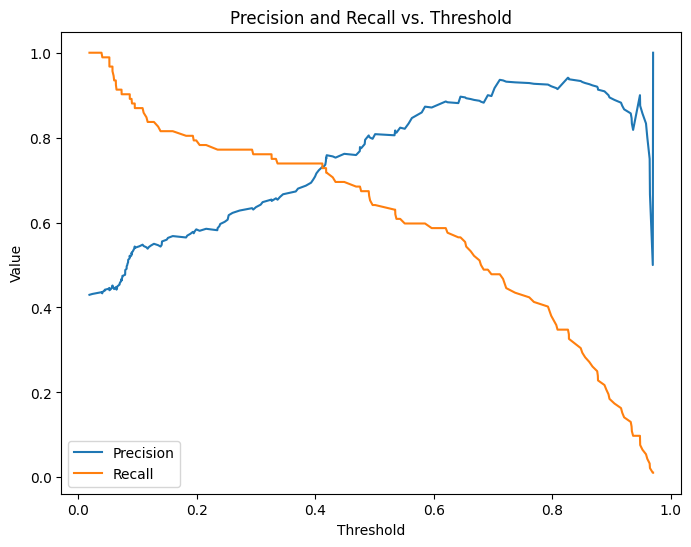

In [27]:
# Compute precision, recall, and thresholds using precision_recall_curve
precisions, recalls, pr_thresholds = precision_recall_curve(y_test, y_prob)

plt.figure(figsize=(8,6))
# Note: precision_recall_curve returns arrays with length = len(thresholds)+1, so we slice to match the thresholds.
plt.plot(pr_thresholds, precisions[:-1], label='Precision')
plt.plot(pr_thresholds, recalls[:-1], label='Recall')
plt.xlabel('Threshold')
plt.ylabel('Value')
plt.title('Precision and Recall vs. Threshold')
plt.legend()
plt.show()

KS Statistic: 0.5509622238061297


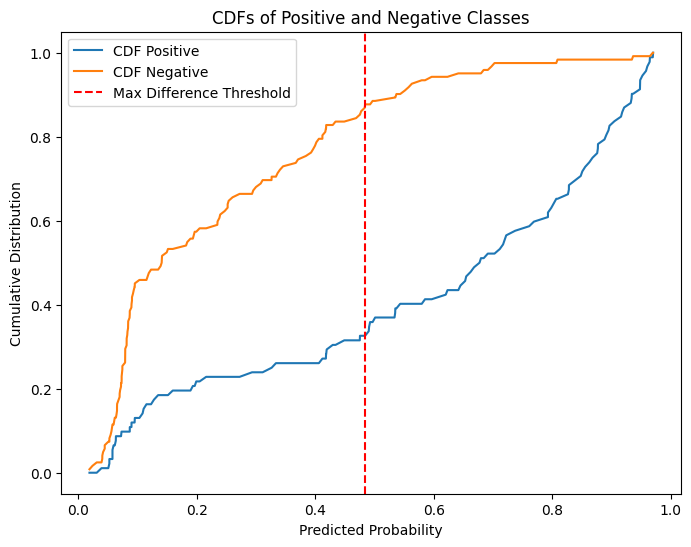

In [23]:
# Compute KS Statistic and Plot CDFs for Positive and Negative Classes
data = pd.DataFrame({'y_true': y_test, 'y_prob': y_prob})
data = data.sort_values(by='y_prob')
data['cum_positive'] = np.cumsum(data['y_true']) / data['y_true'].sum()
data['cum_negative'] = np.cumsum(1 - data['y_true']) / (1 - data['y_true']).sum()
ks_stat = np.max(np.abs(data['cum_positive'] - data['cum_negative']))
print("KS Statistic:", ks_stat)

plt.figure(figsize=(8,6))
plt.plot(data['y_prob'], data['cum_positive'], label='CDF Positive')
plt.plot(data['y_prob'], data['cum_negative'], label='CDF Negative')
max_idx = np.argmax(np.abs(data['cum_positive'] - data['cum_negative']))
plt.axvline(x=data['y_prob'].iloc[max_idx], color='red', linestyle='--', label='Max Difference Threshold')
plt.xlabel('Predicted Probability')
plt.ylabel('Cumulative Distribution')
plt.title('CDFs of Positive and Negative Classes')
plt.legend()
plt.show()

In [24]:
# All metrics computed
metrics = {
    "Accuracy": acc,
    "Precision": prec,
    "Recall (Sensitivity)": rec,
    "F1 Score": f1,
    "F2 Score": f2,
    "AUC": auc,
    "KS Statistic": ks_stat,
    "Optimal Threshold": optimal_threshold
}
print("\nComparative Metrics:")
for metric, value in metrics.items():
    print(f"{metric}: {value:.4f}")


Comparative Metrics:
Accuracy: 0.7804
Precision: 0.8082
Recall (Sensitivity): 0.6413
F1 Score: 0.7152
F2 Score: 0.6689
AUC: 0.8014
KS Statistic: 0.5510
Optimal Threshold: 0.4904
